In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tr = pd.read_csv('train_loan.csv')
tr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
tr.shape

(614, 13)

In [4]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Missing value handling

In [5]:
tr.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# HANDLING CATEGORICAL MISSING VALUES

# Handling missing values of Married

missin = tr['Married'].isna()
tr[missin].index

Index([104, 228, 435], dtype='int64')

In [7]:
tr.dropna(subset = ['Married'], inplace = True)

In [8]:
# Handling missing values of Gender

tr['Gender'].value_counts()

Gender
Male      487
Female    111
Name: count, dtype: int64

In [9]:
gen_mode = tr['Gender'].mode()[0]

In [10]:
tr['Gender'].fillna(gen_mode, inplace = True)

In [11]:
# Handling missing values of Dependents

tr['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [12]:
dep_mode = tr['Dependents'].mode()[0]

In [13]:
tr['Dependents'].fillna(dep_mode, inplace = True)

In [14]:
# Handling the missing values of Self_Employed

tr['Self_Employed'].value_counts()

Self_Employed
No     497
Yes     82
Name: count, dtype: int64

In [15]:
self_mode = tr['Self_Employed'].mode()[0]

In [16]:
tr['Self_Employed'].fillna(self_mode, inplace = True)

In [17]:
tr.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

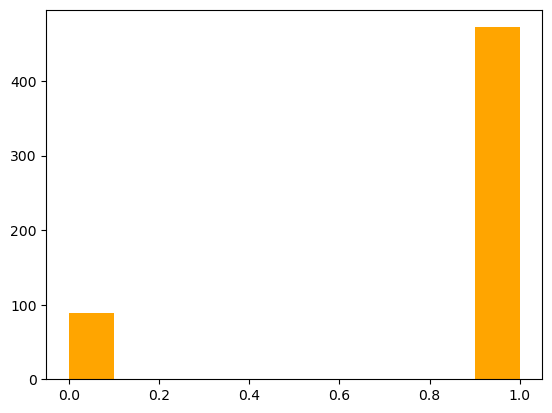

In [18]:
# HANDLING NUMBERICAL MISSING VALUES

# Handling the missing values of Credit_History

plt.hist(tr['Credit_History'], color = 'orange')
plt.show()

In [19]:
tr['Credit_History'] = tr['Credit_History'].fillna((tr['Credit_History']).median())

In [20]:
tr.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

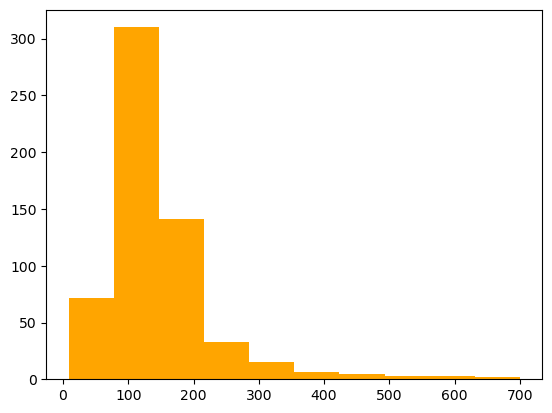

In [21]:
# Handling the missing values of LoanAmount

plt.hist(tr['LoanAmount'], color = 'orange')
plt.show()

In [22]:
tr['LoanAmount'] = tr['LoanAmount'].fillna((tr['LoanAmount']).median())

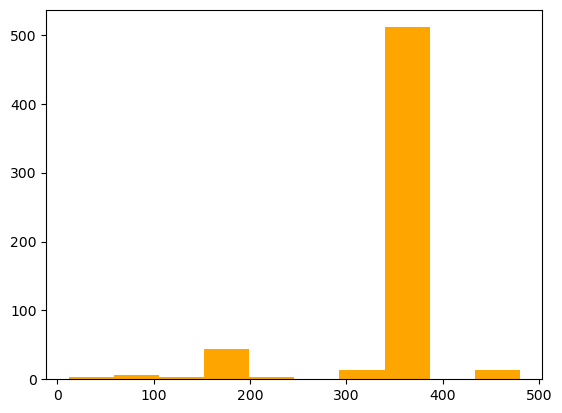

In [23]:
# Handling the missing values of Loan_Amount_Term

plt.hist(tr['Loan_Amount_Term'], color = 'orange')
plt.show()

In [24]:
tr['Loan_Amount_Term'] = tr['Loan_Amount_Term'].fillna((tr['Loan_Amount_Term']).median())

In [25]:
tr.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
# ALL THE MISSING VALUES ARE HANDLED

# Outlier Detection

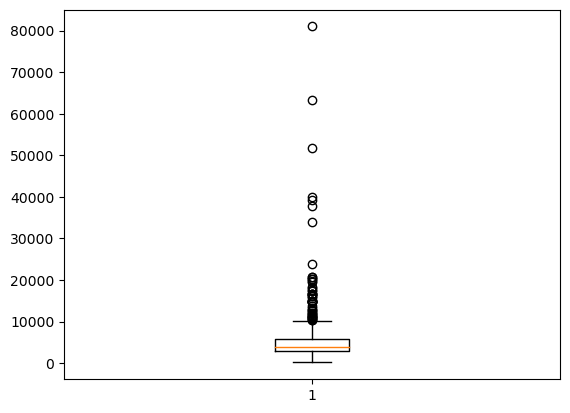

In [27]:
# Checking for outliers in ApplicantIncome

plt.boxplot(tr['ApplicantIncome'])
plt.show()

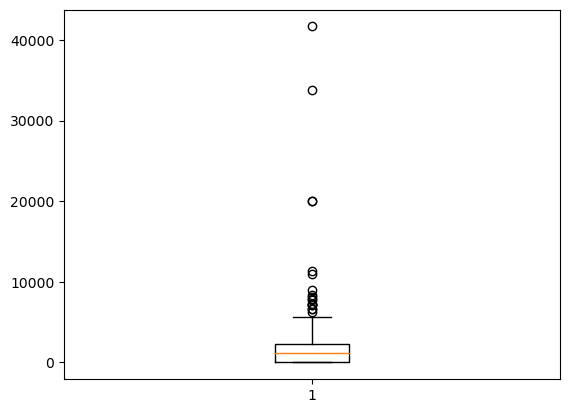

In [28]:
# Checking for outliers in CoapplicantIncome

plt.boxplot(tr['CoapplicantIncome'])
plt.show()

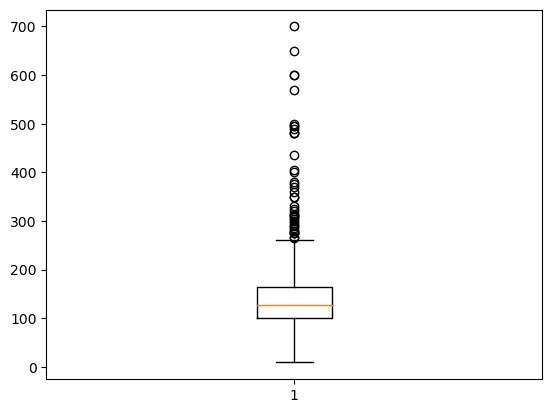

In [29]:
# Checking for outliers in LoanAmount

plt.boxplot(tr['LoanAmount'])
plt.show()

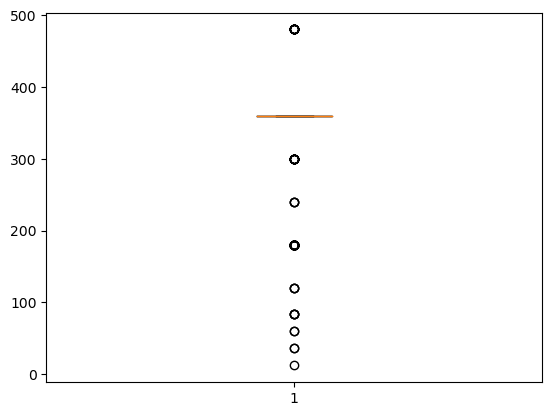

In [30]:
# Checking for outliers in Loan_Amount_Term

plt.boxplot(tr['Loan_Amount_Term'])
plt.show()

In [31]:
tr.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,611.000000,611.000000,611.000000,611.000000,611.000000
mean,5399.513912,1627.972046,145.720949,342.324059,0.854337
std,6120.764249,2931.747971,84.310975,64.208419,0.353057
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2875.500000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1213.000000,127.500000,360.000000,1.000000
75%,5790.000000,2304.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [32]:
# Applying a function for imputting method

def impute(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)

    iqr = q3 - q1
    
    up_lim = q3 + 1.5 * iqr
    low_lim = q1 - 1.5 * iqr
    
    print("IQR = ",iqr, " Upper limit = ",up_lim, " Lower limit = ",low_lim)
    
    return column.apply(lambda x: up_lim if x > up_lim else(low_lim if x < low_lim else x))

IQR =  2914.5  Upper limit =  10161.75  Lower limit =  -1496.25


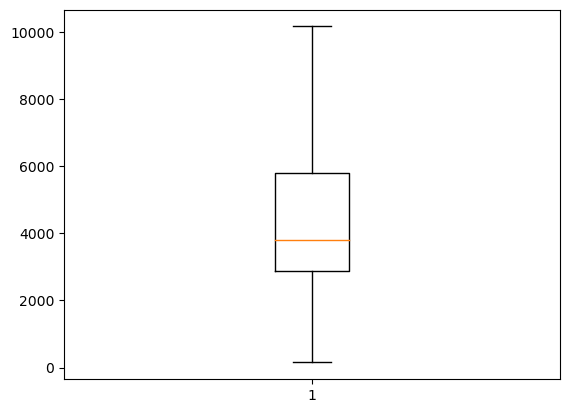

In [33]:
# Handling outliers of ApplicantIncome

tr['ApplicantIncome'] = impute(tr['ApplicantIncome'])
plt.boxplot(tr['ApplicantIncome'])
plt.show()

IQR =  2304.0  Upper limit =  5760.0  Lower limit =  -3456.0


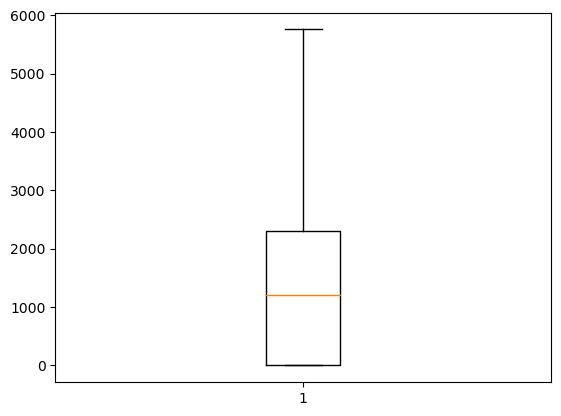

In [34]:
# Handling outliers of CoapplicantIncome

tr['CoapplicantIncome'] = impute(tr['CoapplicantIncome'])
plt.boxplot(tr['CoapplicantIncome'])
plt.show()

IQR =  65.0  Upper limit =  262.5  Lower limit =  2.5


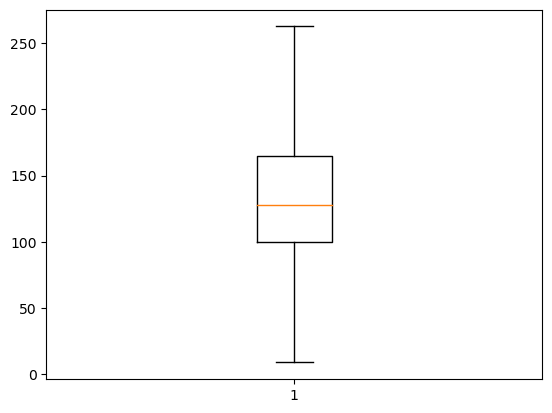

In [35]:
# Handling outliers of LoanAmount

tr['LoanAmount'] = impute(tr['LoanAmount'])
plt.boxplot(tr['LoanAmount'])
plt.show()

IQR =  0.0  Upper limit =  360.0  Lower limit =  360.0


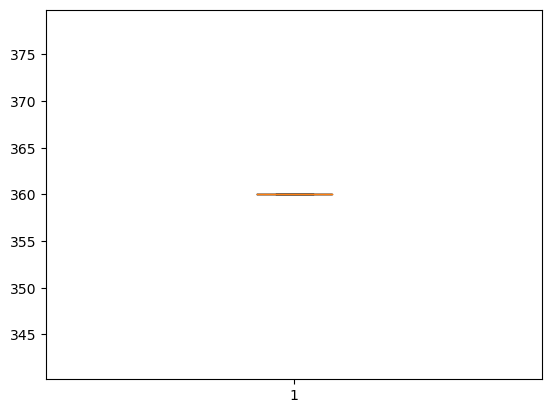

In [36]:
# Handling outliers of Loan_Amount_Term

tr['Loan_Amount_Term'] = impute(tr['Loan_Amount_Term'])
plt.boxplot(tr['Loan_Amount_Term'])
plt.show()

# Encoding

In [37]:
# Label Encoding for Gender, Married, Education and Self_Employed

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

tr['Gender'] = le.fit_transform(tr['Gender'])
tr['Married'] = le.fit_transform(tr['Married'])
tr['Education'] = le.fit_transform(tr['Education'])
tr['Self_Employed'] = le.fit_transform(tr['Self_Employed'])

tr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,127.5,360.0,1.0,Urban,Y
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
tr['Dependents'] = tr['Dependents'].str.strip('+')
tr['Dependents'] = tr['Dependents'].astype('int32')

In [39]:
# dropping loan_ID

tr.drop(columns = ['Loan_ID'], inplace = True)

In [40]:
tr = pd.get_dummies(tr,columns = ['Property_Area'])

In [41]:
tr['Loan_Status'] = le.fit_transform(tr['Loan_Status'])

In [42]:
tr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849.0,0.0,127.5,360.0,1.0,1,False,False,True
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,True,False,False
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,1,False,False,True
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,1,False,False,True
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,1,False,False,True


# Scaling

In [43]:
tr.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [44]:
# Scaling using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

columns_to_scale = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

tr[columns_to_scale] = min_max.fit_transform(tr[columns_to_scale])

In [45]:
tr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.569231,0.000000,0.467456,0.0,1.0,1,False,False,True
1,1,1,1,0,0,0.442780,0.261806,0.469428,0.0,1.0,0,True,False,False
2,1,1,0,0,1,0.284666,0.000000,0.224852,0.0,1.0,1,False,False,True
3,1,1,0,1,0,0.243014,0.409375,0.437870,0.0,1.0,1,False,False,True
4,1,0,0,0,0,0.584313,0.000000,0.520710,0.0,1.0,1,False,False,True
